## Data Preprocessing and Visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import time

In [2]:
df=pd.read_csv('IoT_Intrusion.csv')
df.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1,0,1,...,0.000000,54.00,83343831.92,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0,0,0,...,2.822973,57.04,82926067.47,9.5,10.464666,4.010353,160.987842,0.05,141.55,DoS-TCP_Flood
2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0,0,0,...,0.000000,42.00,83127993.93,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0,0,0,...,0.000000,50.00,83015696.38,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood
4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,0,1,0,...,23.113111,57.88,82972999.18,9.5,11.346876,32.716243,3016.808286,0.19,141.55,DoS-SYN_Flood


In [3]:
label_count=df['label'].value_counts()
label_count

label
DDoS-ICMP_Flood            161281
DDoS-UDP_Flood             121205
DDoS-TCP_Flood             101293
DDoS-PSHACK_Flood           92395
DDoS-SYN_Flood              91644
DDoS-RSTFINFlood            90823
DDoS-SynonymousIP_Flood     80680
DoS-UDP_Flood               74787
DoS-TCP_Flood               59807
DoS-SYN_Flood               45207
BenignTraffic               24476
Mirai-greeth_flood          22115
Mirai-udpplain              20166
Mirai-greip_flood           16952
DDoS-ICMP_Fragmentation     10223
MITM-ArpSpoofing             7019
DDoS-ACK_Fragmentation       6431
DDoS-UDP_Fragmentation       6431
DNS_Spoofing                 4034
Recon-HostDiscovery          3007
Recon-OSScan                 2225
Recon-PortScan               1863
DoS-HTTP_Flood               1680
VulnerabilityScan             809
DDoS-HTTP_Flood               626
DDoS-SlowLoris                493
DictionaryBruteForce          324
BrowserHijacking              140
SqlInjection                  122
CommandI

In [4]:
label_list=label_count.index

In [5]:
final_label_list=[]
for x in label_list:
    if 'DoS' in x and label_count[x]>10000:
        final_label_list.append(x)
    elif 'Benign' in x:
        final_label_list.append(x)
    elif 'Mirai' in x:
        final_label_list.append(x)

final_label_list

['DDoS-ICMP_Flood',
 'DDoS-UDP_Flood',
 'DDoS-TCP_Flood',
 'DDoS-PSHACK_Flood',
 'DDoS-SYN_Flood',
 'DDoS-RSTFINFlood',
 'DDoS-SynonymousIP_Flood',
 'DoS-UDP_Flood',
 'DoS-TCP_Flood',
 'DoS-SYN_Flood',
 'BenignTraffic',
 'Mirai-greeth_flood',
 'Mirai-udpplain',
 'Mirai-greip_flood',
 'DDoS-ICMP_Fragmentation']

In [6]:
df1=df[df['label'].isin(final_label_list)].copy()
df1.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1,0,1,...,0.000000,54.00,83343831.92,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0,0,0,...,2.822973,57.04,82926067.47,9.5,10.464666,4.010353,160.987842,0.05,141.55,DoS-TCP_Flood
2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0,0,0,...,0.000000,42.00,83127993.93,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0,0,0,...,0.000000,50.00,83015696.38,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood
4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,0,1,0,...,23.113111,57.88,82972999.18,9.5,11.346876,32.716243,3016.808286,0.19,141.55,DoS-SYN_Flood


In [7]:
df1['label'].value_counts()

label
DDoS-ICMP_Flood            161281
DDoS-UDP_Flood             121205
DDoS-TCP_Flood             101293
DDoS-PSHACK_Flood           92395
DDoS-SYN_Flood              91644
DDoS-RSTFINFlood            90823
DDoS-SynonymousIP_Flood     80680
DoS-UDP_Flood               74787
DoS-TCP_Flood               59807
DoS-SYN_Flood               45207
BenignTraffic               24476
Mirai-greeth_flood          22115
Mirai-udpplain              20166
Mirai-greip_flood           16952
DDoS-ICMP_Fragmentation     10223
Name: count, dtype: int64

In [8]:
label_rename={}
for x in final_label_list:
    if 'DDoS' in x:
        label_rename[x]='Attack'
    elif 'DoS' in x:
        label_rename[x]='Attack'
    elif 'Mirai' in x:
        label_rename[x]='Attack'
    else:
        label_rename[x]='Benign'
label_rename

{'DDoS-ICMP_Flood': 'Attack',
 'DDoS-UDP_Flood': 'Attack',
 'DDoS-TCP_Flood': 'Attack',
 'DDoS-PSHACK_Flood': 'Attack',
 'DDoS-SYN_Flood': 'Attack',
 'DDoS-RSTFINFlood': 'Attack',
 'DDoS-SynonymousIP_Flood': 'Attack',
 'DoS-UDP_Flood': 'Attack',
 'DoS-TCP_Flood': 'Attack',
 'DoS-SYN_Flood': 'Attack',
 'BenignTraffic': 'Benign',
 'Mirai-greeth_flood': 'Attack',
 'Mirai-udpplain': 'Attack',
 'Mirai-greip_flood': 'Attack',
 'DDoS-ICMP_Fragmentation': 'Attack'}

In [9]:
df1['label'] = df1['label'].replace(label_rename)

In [10]:
label_count=df1['label'].value_counts()
label_count,label_count.index[1]

(label
 Attack    988578
 Benign     24476
 Name: count, dtype: int64,
 'Benign')

In [11]:
label_mapping={label_count.index[i]:i for i in range(2)}
label_mapping

{'Attack': 0, 'Benign': 1}

In [12]:
df1['label'] = df1['label'].replace(label_mapping)
df1.sample(5)

C:\Users\91821\AppData\Local\Temp\ipykernel_10972\410992584.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['label'] = df1['label'].replace(label_mapping)


,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
3833,0.000000,0.0,1.00,64.00,22.915812,22.915812,0.0,0,0,0,...,0.000000,42.00,83150266.39,9.5,9.165151,0.000000,0.000000,0.00,141.55,0
514429,0.020101,18475.0,17.00,64.00,18360.565040,18360.565040,0.0,0,0,0,...,0.000000,50.00,83016664.61,9.5,10.000000,0.000000,0.000000,0.00,141.55,0
437403,0.000000,54.0,6.00,64.00,34.981539,34.981539,0.0,0,0,0,...,0.000000,54.00,83068268.43,9.5,10.392305,0.000000,0.000000,0.00,141.55,0
936459,0.116633,34431.0,17.00,64.00,7645.486121,7645.486121,0.0,0,0,0,...,0.000000,50.00,83106490.47,9.5,10.000000,0.000000,0.000000,0.00,141.55,0
818192,0.000000,0.0,0.99,63.36,100.020365,100.020365,0.0,0,0,0,...,0.982258,42.18,83150318.67,9.5,9.205705,1.390485,5.682759,0.18,141.55,0


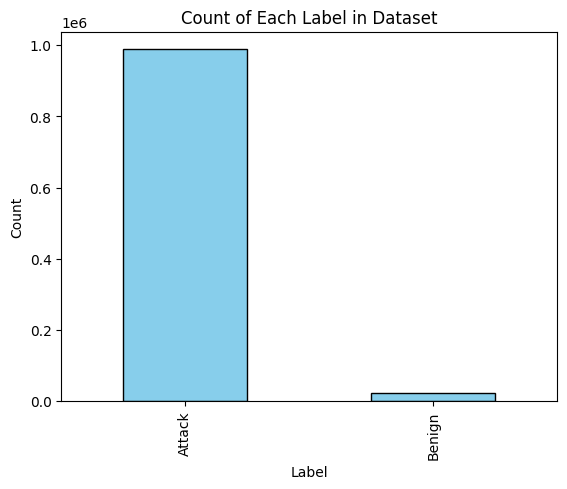

In [13]:
label_count.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Count of Each Label in Dataset')
plt.xlabel('Label')
plt.ylabel('Count')

plt.show()

## Model Building

In [14]:
!pip install torch


In [15]:
# Cell 1: Imports
import numpy as np
import pandas as pd
import time

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

import torch
import torch.nn as nn
import torch.optim as optim


### 1) Data Loading and Preparation

In [16]:
# Replace this with your actual data loading if needed
# Example:
# df1 = pd.read_csv('your_data.csv')

X = df1.iloc[:, :-1].values
y = df1.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.50, random_state=42, stratify=y
)


In [17]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


### 2) One Class SVM

In [18]:
def isolationForest_100(X_train):
    iso_forest = IsolationForest(n_estimators=100, n_jobs=-1, random_state=42, contamination=0.024, verbose=1)
    iso_forest.fit(X_train)
    return iso_forest

def isolationForest_50(X_train):
    iso_forest = IsolationForest(n_estimators=50, n_jobs=-1, random_state=42, contamination=0.024, verbose=1)
    iso_forest.fit(X_train)
    return iso_forest

def oneClassSvm_rbf(X_train):
    oc_svm = OneClassSVM(kernel='rbf', gamma='auto')
    oc_svm.fit(X_train)
    return oc_svm

def oneClassSvm_linear(X_train):
    oc_svm = OneClassSVM(kernel='linear', gamma='auto')
    oc_svm.fit(X_train)
    return oc_svm


In [19]:
# def oneClassSvm_rbf(X_train,class_weights=None):
#     X_train_pro=data_preprocessing_svm(X_train)
#     oc_svm = OneClassSVM(kernel='rbf', gamma='auto')
#     oc_svm.fit(X_train_pro)
#     return oc_svm

In [20]:
# def oneClassSvm_linear(X_train,class_weights=None):
#     X_train_pro=data_preprocessing_svm(X_train)
#     oc_svm = OneClassSVM(kernel='linear', gamma='auto')
#     oc_svm.fit(X_train_pro)
#     return oc_svm

### 3) PyTorch Autoencoder

In [21]:
class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 4)
        )
        self.decoder = nn.Sequential(
            nn.Linear(4, 8),
            nn.ReLU(),
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, input_dim),
            nn.Sigmoid()
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

def train_autoencoder(X_train, epochs=50, batch_size=32, lr=0.001):
    input_dim = X_train.shape[1]
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = Autoencoder(input_dim).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    X_tensor = torch.FloatTensor(X_train).to(device)
    dataset = torch.utils.data.TensorDataset(X_tensor, X_tensor)
    loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

    model.train()
    for epoch in range(epochs):
        epoch_loss = 0
        for batch_x, _ in loader:
            optimizer.zero_grad()
            outputs = model(batch_x)
            loss = criterion(outputs, batch_x)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        if (epoch+1) % 10 == 0 or epoch == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/len(loader):.6f}")
    return model

def autoencoder_predict(model, X_test, threshold=0.05):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    test_tensor = torch.FloatTensor(X_test).to(device)
    model.eval()
    with torch.no_grad():
        reconstructions = model(test_tensor)
        mse = torch.mean((test_tensor - reconstructions) ** 2, dim=1)
    return np.where(mse.cpu().numpy() < threshold, 1, -1)


## Evaluation Functions

In [22]:
def generate_classification_report_iso(model, X_test, y_test):
    if not all(x in [-1, 1] for x in y_test):
        y_test_mapped = y_test.copy()
        y_test_mapped[y_test == 0] = 1
        y_test_mapped[y_test == 1] = -1
    else:
        y_test_mapped = y_test
    print("\n[Isolation Forest] Model Evaluation Started ...")
    start_t = time.time()
    y_pred = model.predict(X_test)
    end_t = time.time()
    print(classification_report(y_test_mapped, y_pred, labels=[1, -1]))
    print(f"Time taken for prediction: {end_t - start_t:.6f} seconds")

def generate_classification_report_ocsvm(model, X_test, y_test):
    if not all(x in [-1, 1] for x in y_test):
        y_test_mapped = y_test.copy()
        y_test_mapped[y_test == 0] = -1
        y_test_mapped[y_test == 1] = 1
    else:
        y_test_mapped = y_test
    print("\n[One-Class SVM] Model Evaluation Started ...")
    start_t = time.time()
    y_pred = model.predict(X_test)
    end_t = time.time()
    print(classification_report(y_test_mapped, y_pred, labels=[1, -1]))
    print(f"Time taken for prediction: {end_t - start_t:.6f} seconds")

def generate_classification_report_autoencoder(model, X_test, y_test, threshold=0.05):
    if not all(x in [-1, 1] for x in y_test):
        y_test_mapped = y_test.copy()
        y_test_mapped[y_test == 0] = -1
        y_test_mapped[y_test == 1] = 1
    else:
        y_test_mapped = y_test
    print("\n[Autoencoder] Model Evaluation Started ...")
    start_t = time.time()
    y_pred = autoencoder_predict(model, X_test, threshold)
    end_t = time.time()
    print(classification_report(y_test_mapped, y_pred, labels=[1, -1]))
    print(f"Time taken for prediction: {end_t - start_t:.6f} seconds")


In [23]:
# pd.DataFrame(y_train).value_counts()

In [24]:
# pd.DataFrame(y_test).value_counts()

In [25]:
# Isolation Forest
iso_100 = isolationForest_100(X_train)
iso_50 = isolationForest_50(X_train)
generate_classification_report_iso(iso_100, X_test, y_test)
generate_classification_report_iso(iso_50, X_test, y_test)

# One-Class SVM (train only on normal data, label == 1)
X_train_normal = X_train_pca[y_train == 1]
oc_svm_rbf = oneClassSvm_rbf(X_train_normal)
oc_svm_linear = oneClassSvm_linear(X_train_normal)
generate_classification_report_ocsvm(oc_svm_rbf, X_test_pca, y_test)
generate_classification_report_ocsvm(oc_svm_linear, X_test_pca, y_test)

# Autoencoder (train only on normal data)
autoencoder_model = train_autoencoder(X_train_normal)
generate_classification_report_autoencoder(autoencoder_model, X_test_pca, y_test, threshold=0.05)


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    0.8s remaining:    4.6s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    0.2s remaining:    1.4s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.3s finished



[Isolation Forest] Model Evaluation Started ...
              precision    recall  f1-score   support

           1       0.99      0.99      0.99    494289
          -1       0.78      0.78      0.78     12238

    accuracy                           0.99    506527
   macro avg       0.89      0.89      0.89    506527
weighted avg       0.99      0.99      0.99    506527

Time taken for prediction: 3.227317 seconds

[Isolation Forest] Model Evaluation Started ...
              precision    recall  f1-score   support

           1       0.99      0.99      0.99    494289
          -1       0.76      0.76      0.76     12238

    accuracy                           0.99    506527
   macro avg       0.88      0.88      0.88    506527
weighted avg       0.99      0.99      0.99    506527

Time taken for prediction: 1.687542 seconds

[One-Class SVM] Model Evaluation Started ...
              precision    recall  f1-score   support

           1       1.00      0.50      0.66     12238
     

C:\Users\91821\OneDrive\Documents\8th sem\major_prj_code\ddos_simulator\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91821\OneDrive\Documents\8th sem\major_prj_code\ddos_simulator\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00     12238
          -1       0.98      1.00      0.99    494289

    accuracy                           0.98    506527
   macro avg       0.49      0.50      0.49    506527
weighted avg       0.95      0.98      0.96    506527

Time taken for prediction: 0.194235 seconds


C:\Users\91821\OneDrive\Documents\8th sem\major_prj_code\ddos_simulator\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
import joblib
import torch

In [27]:


# Dump Isolation Forest and One-Class SVM models using joblib

joblib.dump(oc_svm_rbf, "oc_svm_rbf.pkl")
joblib.dump(oc_svm_linear, "oc_svm_linear.pkl")

# # Dump PyTorch autoencoder model (state_dict is the best practice)
# torch.save(autoencoder_model.state_dict(), "autoencoder_model.pth")


['oc_svm_linear.pkl']

In [33]:
joblib.dump(iso_100, "iso_100.pkl")
joblib.dump(iso_50, "iso_50.pkl")

['iso_50.pkl']

In [28]:
generate_classification_report_iso(iso_100, X_test, y_test)


[Isolation Forest] Model Evaluation Started ...
              precision    recall  f1-score   support

           1       0.99      0.99      0.99    494289
          -1       0.78      0.78      0.78     12238

    accuracy                           0.99    506527
   macro avg       0.89      0.89      0.89    506527
weighted avg       0.99      0.99      0.99    506527

Time taken for prediction: 3.895824 seconds


In [29]:
generate_classification_report_iso(iso_50, X_test, y_test)


[Isolation Forest] Model Evaluation Started ...
              precision    recall  f1-score   support

           1       0.99      0.99      0.99    494289
          -1       0.76      0.76      0.76     12238

    accuracy                           0.99    506527
   macro avg       0.88      0.88      0.88    506527
weighted avg       0.99      0.99      0.99    506527

Time taken for prediction: 1.695705 seconds


In [30]:
array1 = X_train[y_train == 1]
array2 = X_test[y_test == 1]
X_train_normal = np.concatenate((array1, array2), axis=0)

In [31]:
X_train_normal.shape

(24476, 46)

In [32]:
oc_svm_rbf=oneClassSvm_rbf(X_train_normal,class_weights=None)

TypeError: oneClassSvm_rbf() got an unexpected keyword argument 'class_weights'

In [ ]:
oc_svm_linear=oneClassSvm_rbf(X_train_normal,class_weights=None)

In [ ]:
generate_classification_report_ocsvm(oc_svm_rbf, X_test, y_test)

In [ ]:
generate_classification_report_ocsvm(oc_svm_linear, X_test, y_test)